# Portfolio

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import pyfolio as pf

import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

f:\python\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META']
amounts  = [20, 10, 30, 10]

In [3]:
portfolio = {
    'AMD': {
                'amount': 20,
                'date': dt.datetime(2023, 9, 30)
           },
    'AMZN': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
    'BAC': {
                'amount': 30,
                'date': dt.datetime(2023, 9, 30)
           },
    'META': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
}

In [34]:
dl = []
for ticker in list(portfolio.items()):
    print(ticker[0], ticker[1]['date'])
    dl.append(
        [ticker[0],
        yf.download(ticker[0], ticker[1]['date'], dt.datetime.now(), auto_adjust=True)]
    )
dl.head()

AMD 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
AMZN 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
BAC 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
META 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed


[['AMD',                   Open        High         Low       Close     Volume
  Date                                                                 
  2023-10-02  102.209999  103.709999  101.699997  103.269997   45118600
  2023-10-03  101.800003  103.290001   99.169998  100.080002   48117000
  2023-10-04  100.650002  104.400002  100.339996  104.070000   51023200
  2023-10-05  103.410004  103.739998  100.269997  102.910004   51789700
  2023-10-06  102.160004  107.870003  102.029999  107.239998   64807500
  2023-10-09  106.010002  107.309998  104.790001  106.970001   39593200
  2023-10-10  107.489998  110.120003  106.400002  109.010002   57105500
  2023-10-11  109.139999  110.099998  106.930000  108.309998   51085600
  2023-10-12  108.400002  111.309998  107.510002  108.790001   60959400
  2023-10-13  108.650002  108.970001  104.750000  105.089996   52881500
  2023-10-16  105.419998  107.480003  105.029999  106.459999   42464500
  2023-10-17  103.540001  106.290001  101.660004  105.139

In [4]:
df = yf.download(list(portfolio.keys()), dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  4 of 4 completed


Close                                         High             \
                  AMD       AMZN        BAC        META        AMD       AMZN   
Date                                                                            
2023-01-03  64.019997  85.820000  32.270805  124.607788  66.879997  86.959999   
2023-01-04  64.660004  85.139999  32.877502  127.235008  65.790001  86.980003   
2023-01-05  62.330002  83.120003  32.810089  126.805458  64.349998  85.419998   
2023-01-06  63.959999  86.080002  33.137520  129.882202  64.300003  86.400002   
2023-01-09  67.239998  87.360001  32.636749  129.332779  69.320000  89.480003   

                                         Low                        \
                  BAC        META        AMD       AMZN        BAC   
Date                                                                 
2023-01-03  32.829359  126.236065  63.590000  84.209999  31.981900   
2023-01-04  33.532356  128.913228  63.310001  83.360001  32.578969   
2023-01-05  32.877500  128.383785  62.299999  83.070000  32.338211   
2023-01-06  33.301235  130.191871  60.049999  81.430000  32.299693   
2023-01-09  33.474576  132.809086  65.669998  87.080002  32.463405   

                             Open                                      Volume  \
                  META        AMD       AMZN        BAC        META       AMD   
Date                                                                            
2023-01-03  122.150396  66.000000  85.459999  32.001161  122.689825  46851800   
2023-01-04  125.716615  65.000000  86.550003  32.646380  127.244992  47477100   
2023-01-05  124.408000  64.150002  85.330002  32.665635  125.996311  46159500   
2023-01-06  125.906417  63.150002  83.029999  32.829354  128.833312  70161300   
2023-01-09  129.142978  66.220001  87.459999  33.464947  131.020990  69741300   

                                          
                AMZN       BAC      META  
Date                                      
2023-01-03  76706000  35221500  35528500  
2023-01-04  68885100  41998500  32397100  
2023-01-05  67930800  34177000  25447100  
2023-01-06  83303400  34068700  27584500  
2023-01-09  65266100  43818800  26649100

In [5]:
prices = df['Close']

In [6]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.270805,124.607788
2023-01-04,64.660004,85.139999,32.877502,127.235008
2023-01-05,62.330002,83.120003,32.810089,126.805458
2023-01-06,63.959999,86.080002,33.137520,129.882202
2023-01-09,67.239998,87.360001,32.636749,129.332779
...,...,...,...,...
2024-04-16,163.460007,183.320007,34.680000,499.760010
2024-04-17,154.020004,181.279999,35.230000,494.170013
2024-04-18,155.080002,179.220001,35.770000,501.799988


In [11]:
total = []
for t, am in zip(tickers, amounts):
    total.append(prices[t][-1] * am)

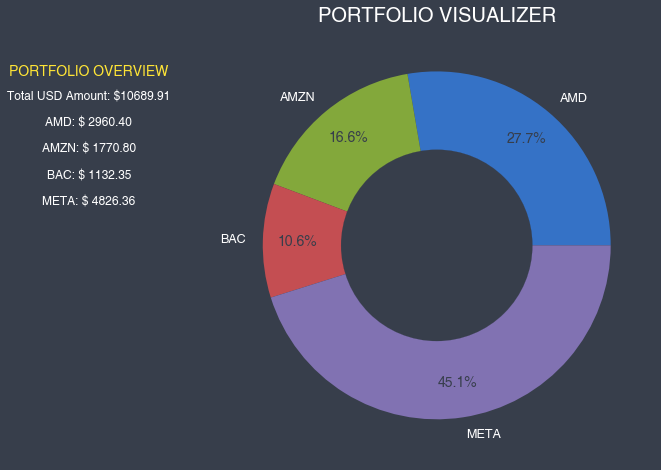

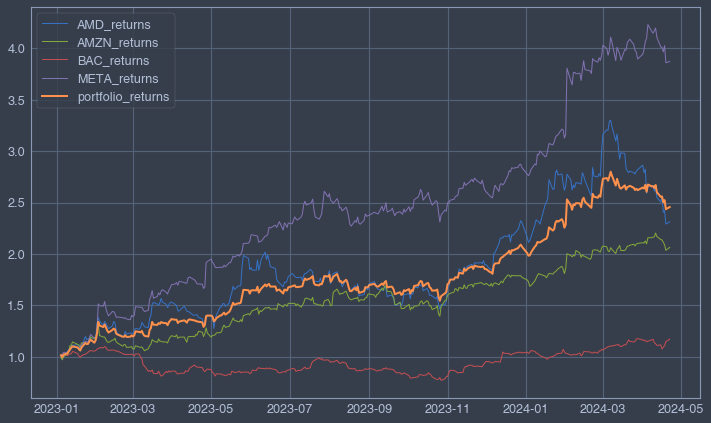

In [20]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('PORTFOLIO VISUALIZER', color='w', fontsize=20)

patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8);

[text.set_color('w') for text in texts]
[autotext.set_color('#373E4B') for autotext in autotexts]
[autotext.set_fontsize(14) for autotext in autotexts]

my_circle = plt.Circle((0, 0), 0.55, color='#373E4B')
plt.gca().add_artist(my_circle)

ax.text(-2, 1, 'PORTFOLIO OVERVIEW', fontsize=14,
                                     color='#ffe536',
                                     verticalalignment='center',
                                     horizontalalignment='center')

ax.text(-2, 0.85, f'Total USD Amount: ${sum(total):.2f}',
                                        fontsize=12, color='w',
                                        verticalalignment='center',
                                        horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.85-counter, f'{ticker}: ${total[tickers.index(ticker)]: .2f}',
                              fontsize=12, color='w',
                              verticalalignment='center',
                              horizontalalignment='center')
    counter += 0.15

fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()

## Returns

In [13]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.270805,124.607788
2023-01-04,64.660004,85.139999,32.877502,127.235008
2023-01-05,62.330002,83.120003,32.810089,126.805458
2023-01-06,63.959999,86.080002,33.137520,129.882202
2023-01-09,67.239998,87.360001,32.636749,129.332779
...,...,...,...,...
2024-04-16,163.460007,183.320007,34.680000,499.760010
2024-04-17,154.020004,181.279999,35.230000,494.170013
2024-04-18,155.080002,179.220001,35.770000,501.799988


In [14]:
prices['portfolio'] = 0
prices

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,AMD,AMZN,BAC,META,portfolio
Date,,,,,
2023-01-03,64.019997,85.820000,32.270805,124.607788,0
2023-01-04,64.660004,85.139999,32.877502,127.235008,0
2023-01-05,62.330002,83.120003,32.810089,126.805458,0
2023-01-06,63.959999,86.080002,33.137520,129.882202,0
2023-01-09,67.239998,87.360001,32.636749,129.332779,0
...,...,...,...,...,...
2024-04-16,163.460007,183.320007,34.680000,499.760010,0
2024-04-17,154.020004,181.279999,35.230000,494.170013,0
2024-04-18,155.080002,179.220001,35.770000,501.799988,0


In [15]:
for i in portfolio.keys():
    prices['portfolio'] += prices[i]*portfolio[i]['amount']

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [16]:
for t in prices.columns:
    prices[f'{t}_returns'] = np.log(prices[t].div(prices[t].shift(1)))

prices

,AMD,AMZN,BAC,META,portfolio,AMD_returns,AMZN_returns,BAC_returns,META_returns,portfolio_returns
Date,,,,,,,,,,
2023-01-03,64.019997,85.820000,32.270805,124.607788,4352.801971,NaN,NaN,NaN,NaN,NaN
2023-01-04,64.660004,85.139999,32.877502,127.235008,4403.275223,0.009947,-0.007955,0.018626,0.020865,0.011529
2023-01-05,62.330002,83.120003,32.810089,126.805458,4330.157318,-0.036700,-0.024012,-0.002053,-0.003382,-0.016745
2023-01-06,63.959999,86.080002,33.137520,129.882202,4432.947617,0.025815,0.034992,0.009930,0.023974,0.023461
2023-01-09,67.239998,87.360001,32.636749,129.332779,4490.830231,0.050010,0.014760,-0.015227,-0.004239,0.012973
...,...,...,...,...,...,...,...,...,...,...
2024-04-16,163.460007,183.320007,34.680000,499.760010,11140.400314,0.019396,-0.001635,-0.035966,-0.000940,0.001527
2024-04-17,154.020004,181.279999,35.230000,494.170013,10891.800194,-0.059486,-0.011191,0.015735,-0.011248,-0.022568
2024-04-18,155.080002,179.220001,35.770000,501.799988,10984.899940,0.006859,-0.011429,0.015212,0.015322,0.008511


In [17]:
prices.dropna(inplace=True)

f:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


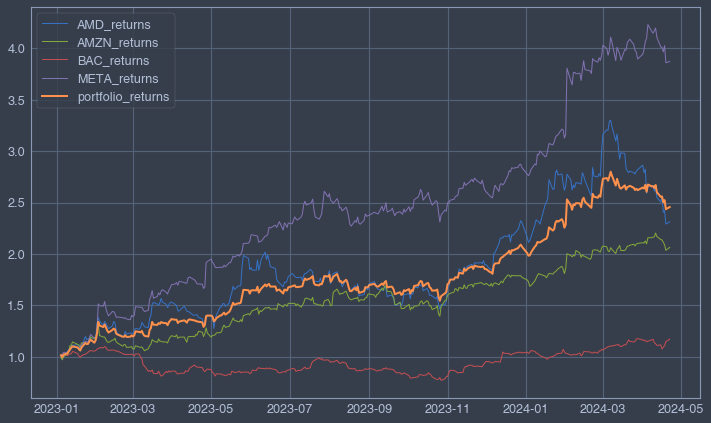

In [21]:
fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Start date,2019-04-24
End date,2024-04-23
Total months,59
,Backtest
Annual return,25.0%
Cumulative returns,204.4%
Annual volatility,32.3%
Sharpe ratio,0.85
Calmar ratio,0.47
Stability,0.51
Max drawdown,-53.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,53.50,2021-11-24,2022-11-03,2024-01-19,563
1,32.53,2020-02-19,2020-03-16,2020-06-08,79
2,14.83,2020-09-02,2020-09-23,2020-12-01,65
3,13.33,2019-07-24,2019-10-02,2019-11-12,80
4,11.25,2019-05-03,2019-06-03,2019-07-01,42


Stress Events,mean,min,max
New Normal,0.11%,-11.71%,11.76%


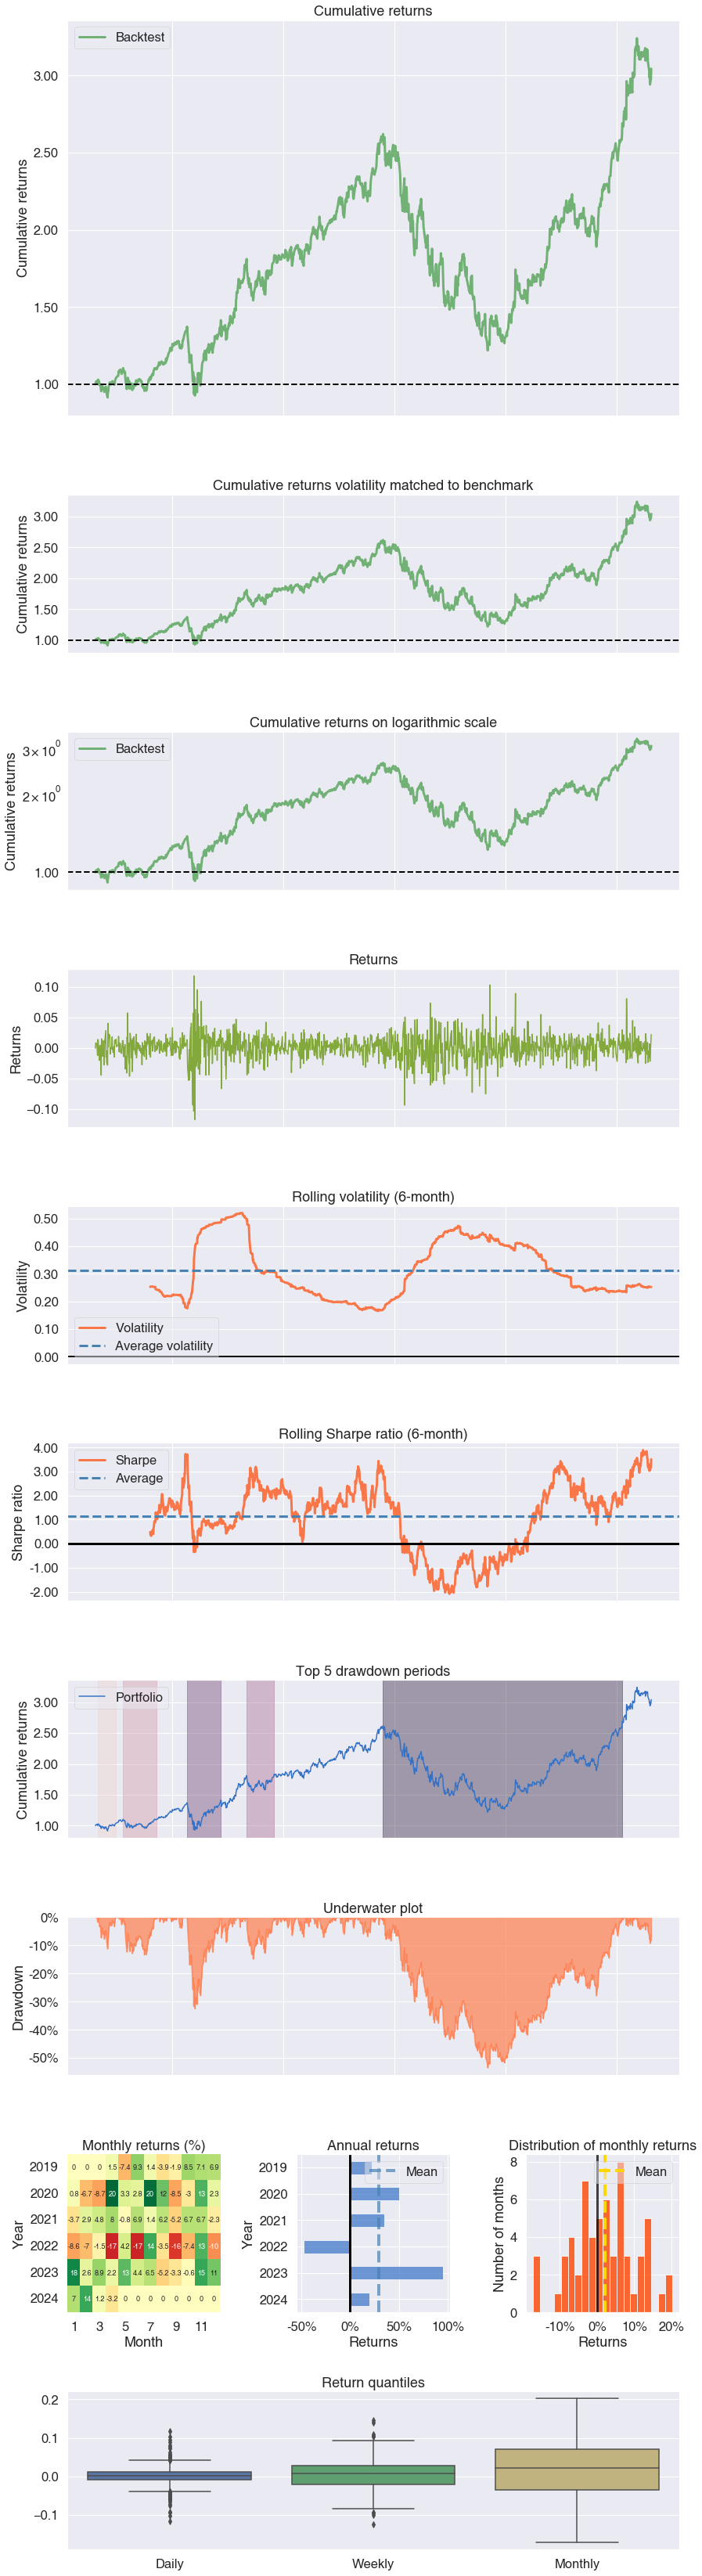

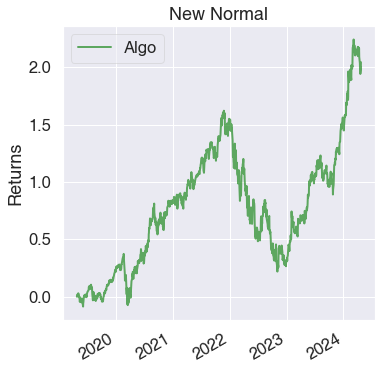

In [3]:
data = pd.DataFrame(columns=tickers)

for ticker in tickers:
     data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
        
data = data.pct_change().dropna().mean(axis=1)

pf.create_full_tear_sheet(data)

## Covariance

In [22]:
returns = prices[['AMD_returns', 'AMZN_returns', 'BAC_returns', 'META_returns']]
returns

,AMD_returns,AMZN_returns,BAC_returns,META_returns
Date,,,,
2023-01-04,0.009947,-0.007955,0.018626,0.020865
2023-01-05,-0.036700,-0.024012,-0.002053,-0.003382
2023-01-06,0.025815,0.034992,0.009930,0.023974
2023-01-09,0.050010,0.014760,-0.015227,-0.004239
2023-01-10,0.011974,0.028327,0.006764,0.026825
...,...,...,...,...
2024-04-16,0.019396,-0.001635,-0.035966,-0.000940
2024-04-17,-0.059486,-0.011191,0.015735,-0.011248
2024-04-18,0.006859,-0.011429,0.015212,0.015322


In [23]:
cov_matrix = returns.cov()
cov_matrix

,AMD_returns,AMZN_returns,BAC_returns,META_returns
AMD_returns,0.000922,0.000295,0.000059,0.000335
AMZN_returns,0.000295,0.000388,0.000044,0.000300
BAC_returns,0.000059,0.000044,0.000264,0.000065
META_returns,0.000335,0.000300,0.000065,0.000616


In [24]:
corr_matrix = returns.corr()

In [25]:
corr_matrix

,AMD_returns,AMZN_returns,BAC_returns,META_returns
AMD_returns,1.000000,0.493508,0.120408,0.444777
AMZN_returns,0.493508,1.000000,0.138539,0.613625
BAC_returns,0.120408,0.138539,1.000000,0.161149
META_returns,0.444777,0.613625,0.161149,1.000000


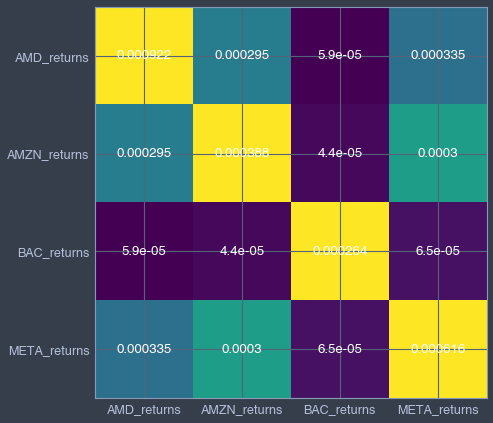

In [26]:
fig, ax = plt.subplots()
ax.imshow(corr_matrix)

ax.set_xticks(np.arange(len(corr_matrix)))
ax.set_xticklabels(returns.columns)
ax.set_yticks(np.arange(len(corr_matrix)))
ax.set_yticklabels(returns.columns)

for i in range(len(returns.columns)):
    for j in range(len(returns.columns)):
        text = ax.text(j, i, round(cov_matrix.iloc[i, j], 6),
                       ha="center", va="center", color="w")

In [27]:
lw = covariance.ledoit_wolf(returns)[0]
lw

array([[8.92952477e-04, 2.73773510e-04, 5.50390561e-05, 3.10709017e-04],
       [2.73773510e-04, 3.98237642e-04, 4.10999791e-05, 2.78207933e-04],
       [5.50390561e-05, 4.10999791e-05, 2.82644481e-04, 6.02019479e-05],
       [3.10709017e-04, 2.78207933e-04, 6.02019479e-05, 6.09121778e-04]])

In [28]:
dates = returns.resample('M').first().index
dates

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [29]:
sample_covs = []
lw_covs = []

for i in range(1, len(dates)):
    sample_cov = returns[dates[i-1]:dates[i]].cov().values
    sample_covs.append(sample_cov)
    
    lw_cov = covariance.ledoit_wolf(returns[dates[i-1]:dates[i]])[0]
    lw_covs.append(lw_cov)

lw_diffs = []
for pair in zip(lw_covs[:-1], lw_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    lw_diffs.append(diff)
    
sample_diffs = []
for pair in zip(sample_covs[:-1], sample_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    sample_diffs.append(diff)

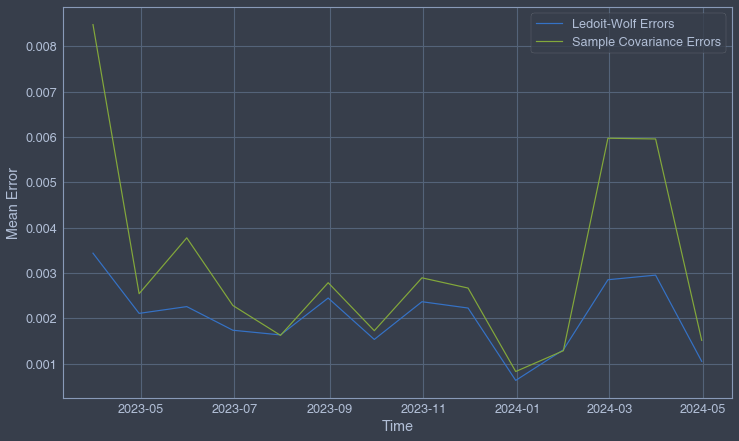

In [30]:
plt.plot(dates[2:], lw_diffs)
plt.plot(dates[2:], sample_diffs)
plt.xlabel('Time')
plt.ylabel('Mean Error')
plt.legend(['Ledoit-Wolf Errors', 'Sample Covariance Errors']);

In [31]:
s_returns = [col for col in prices.columns if '_returns' in col and col != 'portfolio_returns']
s_returns

['AMD_returns', 'AMZN_returns', 'BAC_returns', 'META_returns']

In [32]:
returns_pair_pairs = [(a, b) for idx, a in enumerate(s_returns) for b in s_returns[idx + 1:]]
returns_pair_pairs

[('AMD_returns', 'AMZN_returns'),
 ('AMD_returns', 'BAC_returns'),
 ('AMD_returns', 'META_returns'),
 ('AMZN_returns', 'BAC_returns'),
 ('AMZN_returns', 'META_returns'),
 ('BAC_returns', 'META_returns')]

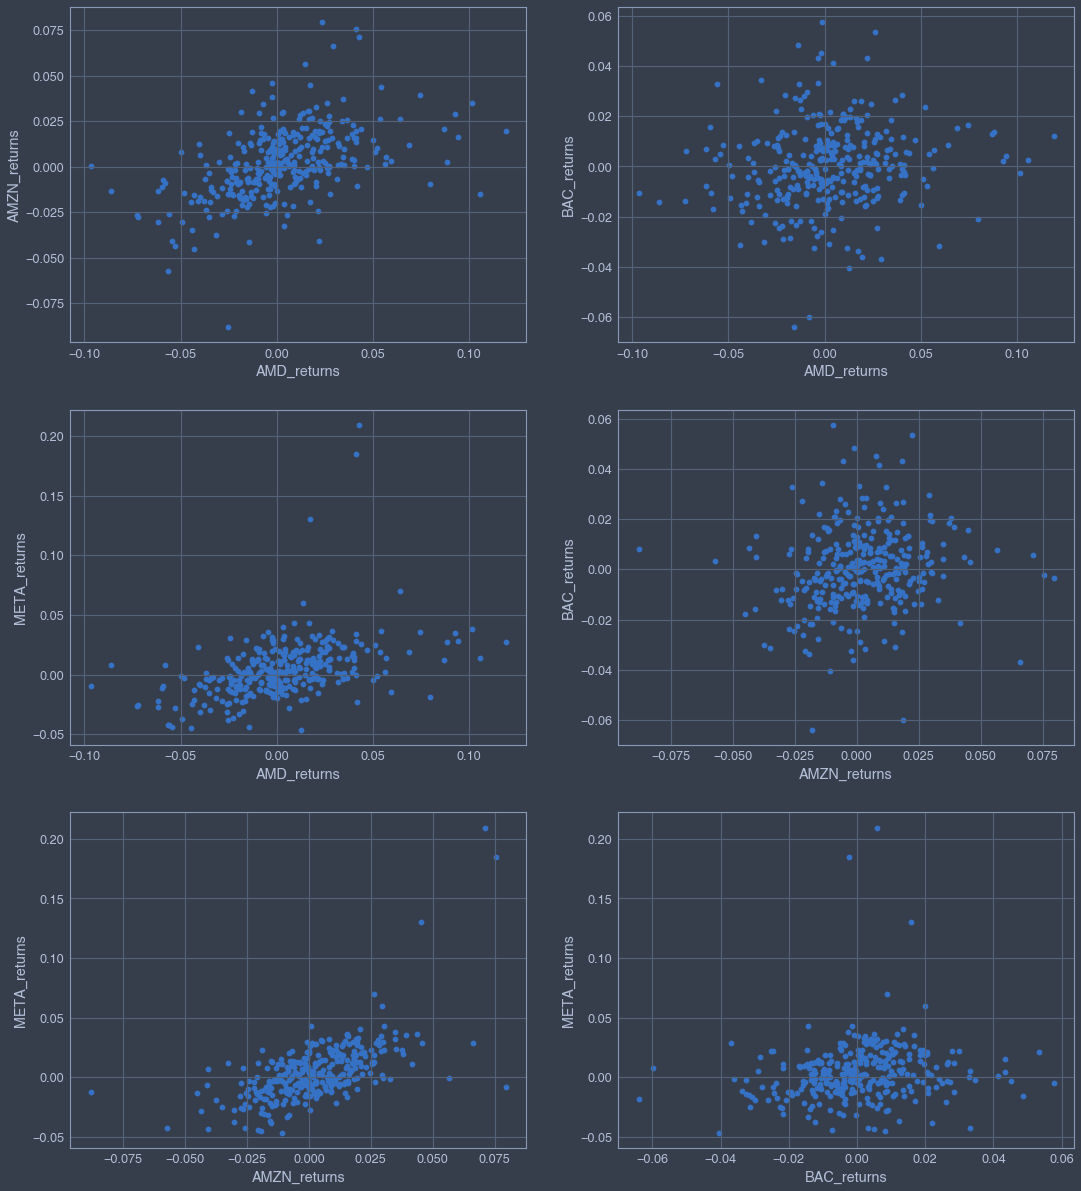

In [33]:
fig, axs = plt.subplots(int(len(returns_pair_pairs)/2), 2, figsize=(18, 21))

i = 0
for x in range(0, int(len(returns_pair_pairs)/2)):
    for y in range(0, 2):
        axs[x, y].scatter(prices[returns_pair_pairs[i][0]], prices[returns_pair_pairs[i][1]])
        axs[x, y].set_xlabel(returns_pair_pairs[i][0])
        axs[x, y].set_ylabel(returns_pair_pairs[i][1])
        i+=1
